# Introduction

Does a Major League Baseball player’s Wins Above Replacement (WAR) have little to no impact on their team’s winning percentage, such that the impact of players with high WAR (μ1) is equivalent to that of players with low WAR (μ2), as proposed by the null hypothesis $H_0:

 μ_1 = μ_2$ or $μ_1 - μ_2 = 0$?"

Alternatively, does a player’s WAR significantly influence their team’s winning chances, such that the impact of players with high WAR (μ1) differs from that of players with low WAR (μ2), as suggested by the alternative hypothesis $H_A:

 μ_1 ≠ μ_2$ or $μ_1 - μ_2 ≠ 0$?

This research addresses the widespread use of WAR among baseball fans, many of whom are unfamiliar with the underlying calculations or its correlation with team success. By combining a mathematical explanation of WAR with statistical analysis of its relationship to team performance and WPA, this report aims to clarify whether WAR is a meaningful indicator of team success or merely an individualistic stat. 

### Explanation of WAR and WPA

Wins Above Replacement (WAR) and Win Probability Added (WPA) are metrics developed during the sabermetric revolution in baseball, popularised by Bill James. Sabermetrics sought to refine player evaluation by introducing new metrics that better capture a player's value (Society for American Baseball Research, n.d.).




# _impoting pandas_

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import openpyxl
import xlrd
from datetime import datetime


In [2]:

%matplotlib inline

# WAR Data Set Analysis

Loading Up the csv File

In [112]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup

def load_data(filepath, url):
    if os.path.isfile(filepath):
        print("Loading from file")
        try:
            return pd.read_csv(filepath, encoding='ISO-8859-1')  # Adjust the encoding as needed
        except Exception as e:
            print(f"Failed to load from file: {e}")
            print("Attempting to load from the internet instead...")

    print("Loading from the internet")
    response = requests.get(url)
    response.raise_for_status()

    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", {"id": "players_value_batting"})
    if table is None:
        raise ValueError("Table with id 'players_value_batting' not found")

    data = pd.read_html(str(table))[0]
    data.to_csv(filepath, index=False)
    return data

filepath = "WAR_2023.csv"
url = "https://www.baseball-reference.com/leagues/majors/2023-value-batting.shtml"

try:
    WAR_2023 = load_data(filepath, url)
    print("Data loading complete")
except Exception as e:
    print(f"Data loading failed: {e}")


Loading from file
Data loading complete


# Glossary # 

Rrep -- Runs from Replacement Level

RAR -- Runs Above Replacement Level

WAR -- Wins Above Replacement

waaWL% -- Win-Loss% w/ Avg. Team

162WL% -- Win-Loss% w/ Avg. Team Season

oWAR -- Offensive Wins Above Replacement (everything but Fielding)

dWAR -- Defensive Wins Above Replacement for Position Players

oRAR -- Offensive Runs Above Replacement Level

Salary

G -- Games Played or Pitched

PA -- Plate Appearances

Rbat -- Runs Batting

Rbaser -- Runs from Baserunning

Rdp -- Runs Grounded into Double Plays

Rfield -- Runs from Fielding

Rpos -- Runs from Positional Scarcity

RAA -- Runs Better than Avg

WAA -- Wins Above Avg
"""


In [123]:
import pandas as pd
import numpy as np

# Read the CSV file with a specific encoding
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='ISO-8859-1')

# Create a subset of your data for demonstration
# We'll use the first 10 rows to keep it manageable
df2 = data.head(10)

# Simple display without any color or extra styling
styled_df = df2.style.set_caption("Simple Table of WAR_2023 Dataset")

# Display the styled DataFrame
styled_df



,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Acquired,Pos Summary,Name-additional
0,1,CJ Abrams*,22,WSN,151,614,-5,4,3,4,9,14,1.400000,21,35,3.400000,0.509000,0.509000,3.000000,1.300000,31,"$724,200",Traded,*6/H,abramcj01
1,2,José Abreu,36,HOU,141,594,-8,-2,-1,-1,-7,-19,-1.900000,20,1,0.000000,0.486000,0.488000,0.100000,-0.800000,2,"$19,500,000",Free Agency,*3/D,abreujo02
2,3,Wilyer Abreu*,24,BOS,28,85,3,0,0,2,0,5,0.500000,3,8,0.800000,0.517000,0.503000,0.600000,0.200000,6,nan,Traded,87/H9D,abreuwi02
3,4,Ronald Acuña Jr.,25,ATL,159,735,63,7,-1,-2,-5,63,6.100000,23,86,8.200000,0.538000,0.538000,8.500000,-0.700000,88,"$17,000,000",Amateur Free Agent,*9/D,acunaro01
4,5,Willy Adames,27,MIL,149,638,-5,-3,0,8,9,10,1.000000,21,31,3.000000,0.507000,0.506000,2.200000,1.700000,23,"$8,700,000",Traded,*6/D,adamewi01
5,6,Jordyn Adams,23,LAA,17,40,-6,-1,0,-1,0,-8,-0.900000,1,-7,-0.700000,0.450000,0.495000,-0.600000,-0.100000,-6,nan,Amateur Draft,/98H7,adamsjo03
6,7,Riley Adams,27,WSN,44,158,3,-1,-1,1,3,5,0.500000,5,11,1.000000,0.512000,0.503000,1.000000,0.400000,10,"$728,800",Traded,2/HD,adamsri03
7,8,Ty Adcock,26,SEA,1,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0.500000,0.500000,0.000000,0.000000,0,nan,Amateur Draft,1,adcocty01
8,9,Jo Adell,24,LAA,17,62,-2,0,0,3,0,1,0.100000,2,3,0.300000,0.507000,0.501000,0.000000,0.300000,0,nan,Amateur Draft,/987DH,adelljo01
9,10,Ehire Adrianza#,33,ATL,5,11,-2,0,0,-1,0,-3,-0.300000,0,-3,-0.300000,0.432000,0.498000,-0.200000,-0.100000,-2,"$1,000,000",Traded,/H6,adriaeh01


### Explanation of WAR

WAR attempts to quantify a player's overall value, including contributions from batting, fielding, and base-running. FanGraphs defines WAR as:

$$
\text{WAR} = \frac{\text{Batting Runs} + \text{Base Running Runs} + \text{Fielding Runs} + \text{Positional Adjustment} + \text{League Adjustment} + \text{Replacement Runs}}{\text{Runs Per Win}}
$$

In simple terms, WAR calculates the value a player adds to a team, with adjustments for their position and league context. For instance, a good hitter in a tough position, like catcher, is more valuable than a designated hitter with similar stats. Replacement runs measure the difference between a replacement-level player and an average player:

$$
\text{Replacement Runs} = 570 \left(\frac{\text{MLB Games}}{2430}\right) \left(\frac{\text{Runs Per Win}}{\text{League Plate Appearances}}\right) \times \text{Plate Appearances}
$$

Where the numeral 570 represents 57% of the 1000 WAR allocated to position players, and MLB games are how many games have been played in the MLB season at a specific point. 

Runs Per Win includes a second formula, which calculates the runs necessary to win an MLB game (usually between 9 and 10). RPW = 

$$
9 \left(\frac{\text{MLB Runs Scored}}{\text{MLB Innings Pitched}}\right) \times 1.5 + 3
$$

While there are many details within the WAR formula, this overview provides the key concepts behind its calculation (Slowinski, 2012).

The below graph represents the distribution of WAR in the 2023 season, with a WAR of 0 being the most common as it included players with Nil to low game time throughout the 2023 season, having little impact on their teams outcomes.

In [124]:
import pandas as pd
import plotly.express as px

# Load the CSV data with the correct encoding
file_path = "WAR_2023.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Adjust encoding if necessary

# Extract the WAR column (assuming it's the 16th column, index 15)
war_column = df.iloc[:, 15]

# Compute the frequency distribution of the WAR values
war_counts = war_column.value_counts().sort_index()

# Create an interactive line plot using Plotly
fig = px.line(
    x=war_counts.index,
    y=war_counts.values,
    title="Distribution of WAR in the 2023 Season",
    labels={'x': 'WAR', 'y': 'Frequency of Players'},
    template='plotly_dark',  # Use a dark theme for visual appeal
)

# Customize the plot further
fig.update_layout(
    xaxis_title="WAR",
    yaxis_title="Frequency of Players",
    title_x=0.5,  # Center the title
    showlegend=False,
    hovermode='x unified',  # Show hover information along the x-axis
)

# Add interactivity features
fig.update_traces(
    hovertemplate='WAR: %{x}<br>Frequency of Players: %{y}<extra></extra>',  # Custom tooltip
    line=dict(color='rgba(255, 65, 54, 0.7)', width=3),  # Customize line color and width
)

# Show the plot
fig.show()

### Creating a list of the top 50 players based of their WAR

In [183]:

def get_top_50_numbers(data):
    try:
        # Extract column names for columns 2, 4, 6, 16, and 18
        column_2_name = data.columns[1]  # Column 2 (index 1)
        column_4_name = data.columns[3]  # Column 4 (index 3)
        column_6_name = data.columns[5]  # Column 6 (index 5)
        column_16_name = data.columns[15]  # Column 16 (index 15)
        column_18_name = data.columns[17]  # Column 18 (index 17)
        
        # Extract columns 2, 4, 6, 16, and 18
        column_2 = data.iloc[:, 1]
        column_4 = data.iloc[:, 3]
        column_6 = data.iloc[:, 5]
        column_16 = data.iloc[:, 15]
        column_18 = data.iloc[:, 17]
        
        # Convert column 18 values to percentages
        column_18_percentage = column_18 * 100
        
        # Combine the columns into a new DataFrame with their original titles
        combined_data = pd.DataFrame({
            column_2_name: column_2,
            column_4_name: column_4,
            column_6_name: column_6,
            column_16_name: column_16,
            f"{column_18_name} (%)": column_18_percentage  # Renaming to indicate percentage
        })
        
        # Sort the data based on column 16 in descending order
        sorted_data = combined_data.sort_values(by=column_16_name, ascending=False)
        
        # Retrieve the top 50 rows based on column 16
        top_50 = sorted_data.head(50).reset_index(drop=True)
        
        # Display the top 50 in a styled table
        styled_top_50 = top_50.style.set_caption("Top 50 Entries from WAR_2023 Dataset")
        return styled_top_50
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming `data` is already a DataFrame loaded with the necessary data
data = pd.read_csv("WAR_2023.csv", encoding='latin1')

# Get the top 50 numbers from column 16 and their corresponding values in columns 2, 4, 6, and 18 with original titles
get_top_50_numbers(data)


,Name,Tm,PA,WAR,162WL% (%)
0,Mookie Betts,LAD,693,8.300000,53.900000
1,Ronald Acuña Jr.,ATL,735,8.200000,53.800000
2,Marcus Semien,TEX,753,7.400000,53.100000
3,Matt Olson*,ATL,720,7.400000,53.200000
4,Corey Seager*,TEX,536,6.900000,53.200000
5,Freddie Freeman*,LAD,730,6.500000,52.700000
6,Gunnar Henderson*,BAL,622,6.200000,52.500000
7,Shohei Ohtani*,LAA,599,6.000000,52.800000
8,Francisco Lindor#,NYM,687,6.000000,52.400000
9,Austin Riley,ATL,715,5.900000,52.300000


### Creating a List of the bottom 50 Players based of their WAR.

In [184]:
import pandas as pd

def get_bottom_50_numbers(data):
    try:
        # Extract column names for columns 2, 4, 6, 16, and 18
        column_2_name = data.columns[1]  # Column 2 (index 1)
        column_4_name = data.columns[3]  # Column 4 (index 3)
        column_6_name = data.columns[5]  # Column 6 (index 5)
        column_16_name = data.columns[15]  # Column 16 (index 15)
        column_18_name = data.columns[17]  # Column 18 (index 17)
        
        # Extract columns 2, 4, 6, 16, and 18
        column_2 = data.iloc[:, 1]
        column_4 = data.iloc[:, 3]
        column_6 = data.iloc[:, 5]
        column_16 = data.iloc[:, 15]
        column_18 = data.iloc[:, 17]
        
        # Convert column 18 values to percentages
        column_18_percentage = column_18 * 100
        
        # Combine the columns into a new DataFrame with their original titles
        combined_data = pd.DataFrame({
            column_2_name: column_2,
            column_4_name: column_4,
            column_6_name: column_6,
            column_16_name: column_16,
            f"{column_18_name} (%)": column_18_percentage  # Renaming to indicate percentage
        })
        
        # Sort the data based on column 16 in ascending order
        sorted_data = combined_data.sort_values(by=column_16_name, ascending=True)
        
        # Retrieve the bottom 50 rows based on column 16
        bottom_50 = sorted_data.head(50).reset_index(drop=True)
        
        # Display the bottom 50 in a styled table
        styled_bottom_50 = bottom_50.style.set_caption("Bottom 50 Entries from WAR_2023 Dataset")
        return styled_bottom_50
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming `data` is already a DataFrame loaded with the necessary data
data = pd.read_csv("WAR_2023.csv", encoding='latin1')

# Get the bottom 50 numbers from column 16 and their corresponding values in columns 2, 4, 6, and 18 with original titles
get_bottom_50_numbers(data)


,Name,Tm,PA,WAR,162WL% (%)
0,Tim Anderson,CHW,524,-2.000000,47.700000
1,Jean Segura,MIA,326,-1.900000,48.200000
2,Oscar Colás*,CHW,263,-1.500000,48.500000
3,Gavin Sheets*,CHW,344,-1.500000,48.300000
4,Michael Toglia#,COL,152,-1.500000,48.800000
5,Nick Maton*,DET,293,-1.500000,48.500000
6,Oswaldo Cabrera#,NYY,330,-1.500000,48.400000
7,Trey Mancini,CHC,263,-1.400000,48.600000
8,Oscar González,CLE,180,-1.400000,48.800000
9,Harold Castro*,COL,270,-1.400000,48.600000


### By collecting the Mean, Meadian, Variance and standard deviation, it allows to determine whether there is a corralation between my datasets. ###

In [132]:
import pandas as pd

# Load the data
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='latin1')

# Extract column 16 (WAR values)
column_16_name = data.columns[15]  # Adjust the index if needed

# Sort the data based on column 16 in descending order
sorted_data = data.sort_values(by=column_16_name, ascending=False)

# Retrieve the top 50 and bottom 50 rows based on column 16
top_50 = sorted_data.head(50).reset_index(drop=True)
bottom_50 = sorted_data.tail(50).reset_index(drop=True)

# Calculate statistics for the top 50
top_50_stats = {
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation'],
    'Top 50': [
        top_50[column_16_name].mean(),
        top_50[column_16_name].median(),
        top_50[column_16_name].var(),
        top_50[column_16_name].std()
    ]
}

# Calculate statistics for the bottom 50
bottom_50_stats = {
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation'],
    'Bottom 50': [
        bottom_50[column_16_name].mean(),
        bottom_50[column_16_name].median(),
        bottom_50[column_16_name].var(),
        bottom_50[column_16_name].std()
    ]
}

# Create DataFrames for top and bottom statistics
top_50_df = pd.DataFrame(top_50_stats).set_index('Statistic')
bottom_50_df = pd.DataFrame(bottom_50_stats).set_index('Statistic')

# Display the tables side by side using pandas styling
top_50_styled = top_50_df.style.set_caption("Top 50 WAR/162 Games").set_table_styles([
    {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
    {'selector': 'th', 'props': 'font-weight: bold;'},
])

bottom_50_styled = bottom_50_df.style.set_caption("Lowest 50 WAR/162 Games").set_table_styles([
    {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
    {'selector': 'th', 'props': 'font-weight: bold;'},
])

# Display in Jupyter Notebook
display(top_50_styled)
display(bottom_50_styled)



,Top 50
Statistic,
Mean,5.090000
Median,4.900000
Variance,1.235612
Standard Deviation,1.111581


,Bottom 50
Statistic,
Mean,-1.066667
Median,-1.000000
Variance,0.112273
Standard Deviation,0.335071


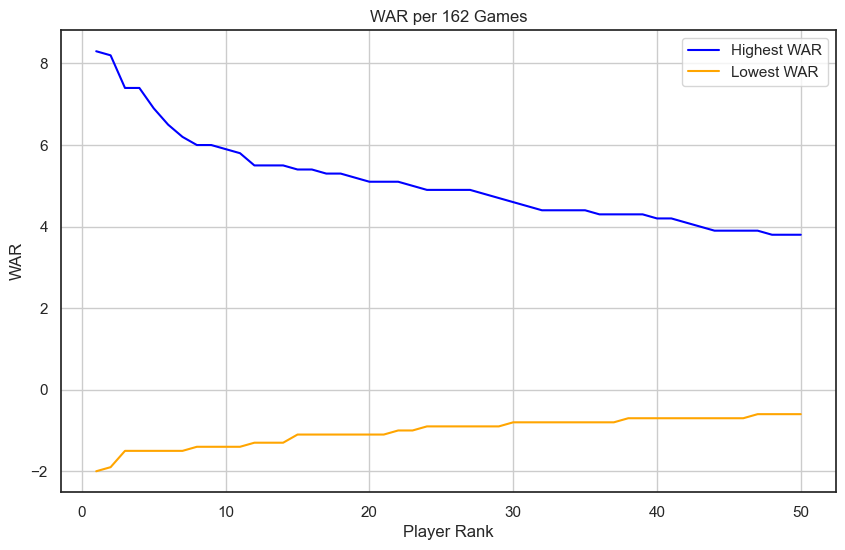

In [201]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 16 columns
if df.shape[1] < 16:
    raise ValueError("The CSV file does not have at least 16 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_values = column_16.nlargest(50)

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Create an index for x-axis
    index = range(1, 51)

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(index, top_50_values.values, label='Highest WAR', color='blue')
    plt.plot(index, bottom_50_values.values, label='Lowest WAR', color='orange')
    plt.title('WAR per 162 Games')
    plt.xlabel('Player Rank')
    plt.ylabel('WAR')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the data: {e}")


### By creating a box plot I am able to compair the avarges of the top 50 WAR and bottom 50 WAR.

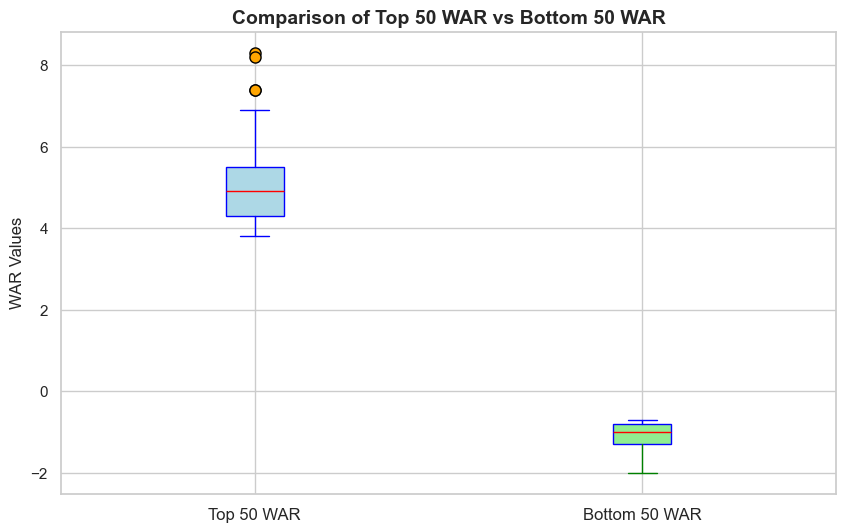

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='latin1')

# Extract column 16 (WAR values)
column_16_name = data.columns[15]  # Adjust the index if needed

# Sort the data based on column 16 in descending order
sorted_data = data.sort_values(by=column_16_name, ascending=False)

# Retrieve the top 50 and bottom 50 rows based on column 16
top_50 = sorted_data.head(50).reset_index(drop=True)
bottom_50 = sorted_data.tail(50).reset_index(drop=True)

# Extract the WAR values for top 50 and bottom 50
top_50_war = top_50[column_16_name]
bottom_50_war = bottom_50[column_16_name]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Top 50 WAR': top_50_war,
    'Bottom 50 WAR': bottom_50_war
})

# Plotting the box plot
plt.figure(figsize=(10, 6))

# Pandas' built-in box plot with different colors for each box
boxplot = plot_data.boxplot(patch_artist=True,
                            boxprops=dict(facecolor='lightblue', color='blue'),  # Color of the top 50 box
                            medianprops=dict(color='red'),                      # Color of the median line
                            whiskerprops=dict(color='blue'),                    # Color of the whiskers
                            capprops=dict(color='blue'),                        # Color of the caps
                            flierprops=dict(markerfacecolor='orange', marker='o', markersize=8, linestyle='none'),  # Outliers
                            return_type='dict')

# Coloring the bottom 50 WAR differently
for whisker, cap, box, median, flier in zip(boxplot['whiskers'][2:], boxplot['caps'][2:], boxplot['boxes'][1:], boxplot['medians'][1:], boxplot['fliers'][1:]):
    whisker.set_color('green')
    cap.set_color('green')
    box.set(facecolor='lightgreen')
    median.set_color('red')
    flier.set(markerfacecolor='orange', marker='o', markersize=8, linestyle='none')

# Set plot title and labels
plt.title("Comparison of Top 50 WAR vs Bottom 50 WAR", fontsize=14, fontweight='bold')
plt.ylabel("WAR Values")
plt.xticks([1, 2], ['Top 50 WAR', 'Bottom 50 WAR'], fontsize=12)

plt.show()


The box plot clearly indicates that there is a substantial difference in WAR values between the top and bottom 50 players. This suggests that the impact of players with high WAR on their teams is likely different from those with low WAR, although further analysis would be required to directly link this difference to team winning percentages.

In [146]:
import pandas as pd

# Load the data
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='latin1')

# Extract the column name for column 18 (which we will convert to percentages)
column_18_name = data.columns[17]  # Adjust the index if needed

# Sort the data based on WAR (column 16) in descending order
column_16_name = data.columns[15]
sorted_data = data.sort_values(by=column_16_name, ascending=False)

# Retrieve the top 50 and bottom 50 rows based on column 16
top_50 = sorted_data.head(50).reset_index(drop=True)
bottom_50 = sorted_data.tail(50).reset_index(drop=True)

# Convert column 18 values to percentages and round to two decimal places
top_50[f"{column_18_name} (%)"] = (top_50[column_18_name] * 100).round(2)
bottom_50[f"{column_18_name} (%)"] = (bottom_50[column_18_name] * 100).round(2)

# Calculate statistics for the top 50 percentage values
top_50_stats = {
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation'],
    f"Top 50 {column_18_name} (%)": [
        top_50[f"{column_18_name} (%)"].mean(),
        top_50[f"{column_18_name} (%)"].median(),
        top_50[f"{column_18_name} (%)"].var(),
        top_50[f"{column_18_name} (%)"].std()
    ]
}

# Calculate statistics for the bottom 50 percentage values
bottom_50_stats = {
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation'],
    f"Bottom 50 {column_18_name} (%)": [
        bottom_50[f"{column_18_name} (%)"].mean(),
        bottom_50[f"{column_18_name} (%)"].median(),
        bottom_50[f"{column_18_name} (%)"].var(),
        bottom_50[f"{column_18_name} (%)"].std()
    ]
}

# Create DataFrames for top and bottom statistics
top_50_df = pd.DataFrame(top_50_stats).set_index('Statistic')
bottom_50_df = pd.DataFrame(bottom_50_stats).set_index('Statistic')

# Display the top 50 statistics table
top_50_styled = top_50_df.style.set_caption(f"Top 50 {column_18_name} Statistics (as Percentage)").set_table_styles([
    {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
    {'selector': 'th', 'props': 'font-weight: bold;'},
])

# Display the bottom 50 statistics table
bottom_50_styled = bottom_50_df.style.set_caption(f"Bottom 50 {column_18_name} Statistics (as Percentage)").set_table_styles([
    {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
    {'selector': 'th', 'props': 'font-weight: bold;'},
])

# Display in Jupyter Notebook
display(top_50_styled)
display(bottom_50_styled)


,Top 50 162WL% (%)
Statistic,
Mean,51.946000
Median,51.850000
Variance,0.422535
Standard Deviation,0.650027


,Bottom 50 162WL% (%)
Statistic,
Mean,48.910870
Median,48.900000
Variance,0.190324
Standard Deviation,0.436261


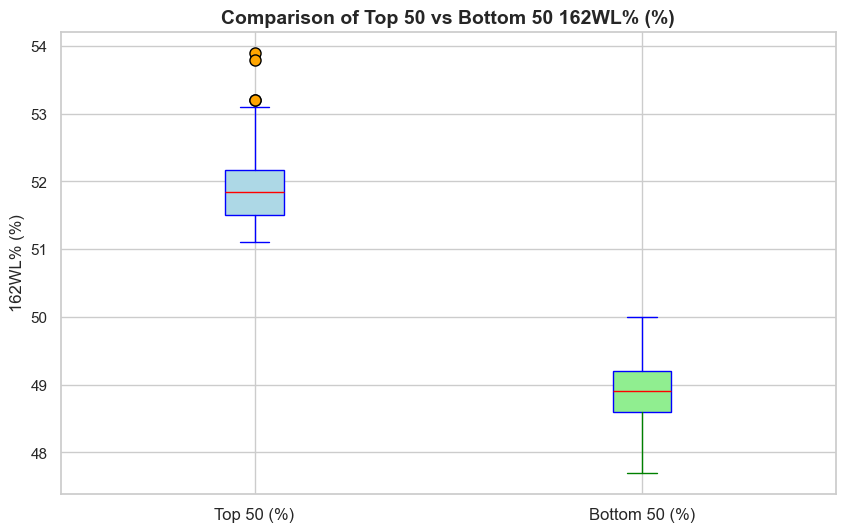

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='latin1')

# Extract column 16 (WAR values) and column 18 (which we will convert to percentages)
column_18_name = data.columns[17]  # Adjust the index if needed

# Sort the data based on WAR (column 16) in descending order
column_16_name = data.columns[15]
sorted_data = data.sort_values(by=column_16_name, ascending=False)

# Retrieve the top 50 and bottom 50 rows based on column 16
top_50 = sorted_data.head(50).reset_index(drop=True)
bottom_50 = sorted_data.tail(50).reset_index(drop=True)

# Convert column 18 values to percentages
top_50_percentage = (top_50[column_18_name] * 100).round(2)
bottom_50_percentage = (bottom_50[column_18_name] * 100).round(2)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Top 50 (%)': top_50_percentage,
    'Bottom 50 (%)': bottom_50_percentage
})

# Plotting the box plot
plt.figure(figsize=(10, 6))

# Pandas' built-in box plot with different colors for each box
boxplot = plot_data.boxplot(patch_artist=True,
                            boxprops=dict(facecolor='lightblue', color='blue'),  # Color of the top 50 box
                            medianprops=dict(color='red'),                      # Color of the median line
                            whiskerprops=dict(color='blue'),                    # Color of the whiskers
                            capprops=dict(color='blue'),                        # Color of the caps
                            flierprops=dict(markerfacecolor='orange', marker='o', markersize=8, linestyle='none'),  # Outliers
                            return_type='dict')

# Coloring the bottom 50 (%) differently
for whisker, cap, box, median, flier in zip(boxplot['whiskers'][2:], boxplot['caps'][2:], boxplot['boxes'][1:], boxplot['medians'][1:], boxplot['fliers'][1:]):
    whisker.set_color('green')
    cap.set_color('green')
    box.set(facecolor='lightgreen')
    median.set_color('red')
    flier.set(markerfacecolor='orange', marker='o', markersize=8, linestyle='none')

# Set plot title and labels
plt.title(f"Comparison of Top 50 vs Bottom 50 {column_18_name} (%)", fontsize=14, fontweight='bold')
plt.ylabel(f"{column_18_name} (%)")
plt.xticks([1, 2], ['Top 50 (%)', 'Bottom 50 (%)'], fontsize=12)

plt.show()


The winning percentages of teams with top and bottom WAR players are relatively close, despite the observable difference in central tendencies. This suggests that while high WAR players tend to push their teams toward better performance, the overall difference in team success, as measured by winning percentage, is not extremely wide. This tight clustering of percentages implies that other factors also play crucial roles in determining a team's winning percentage, keeping the overall performance metrics of teams relatively close, even across different levels of player WAR.

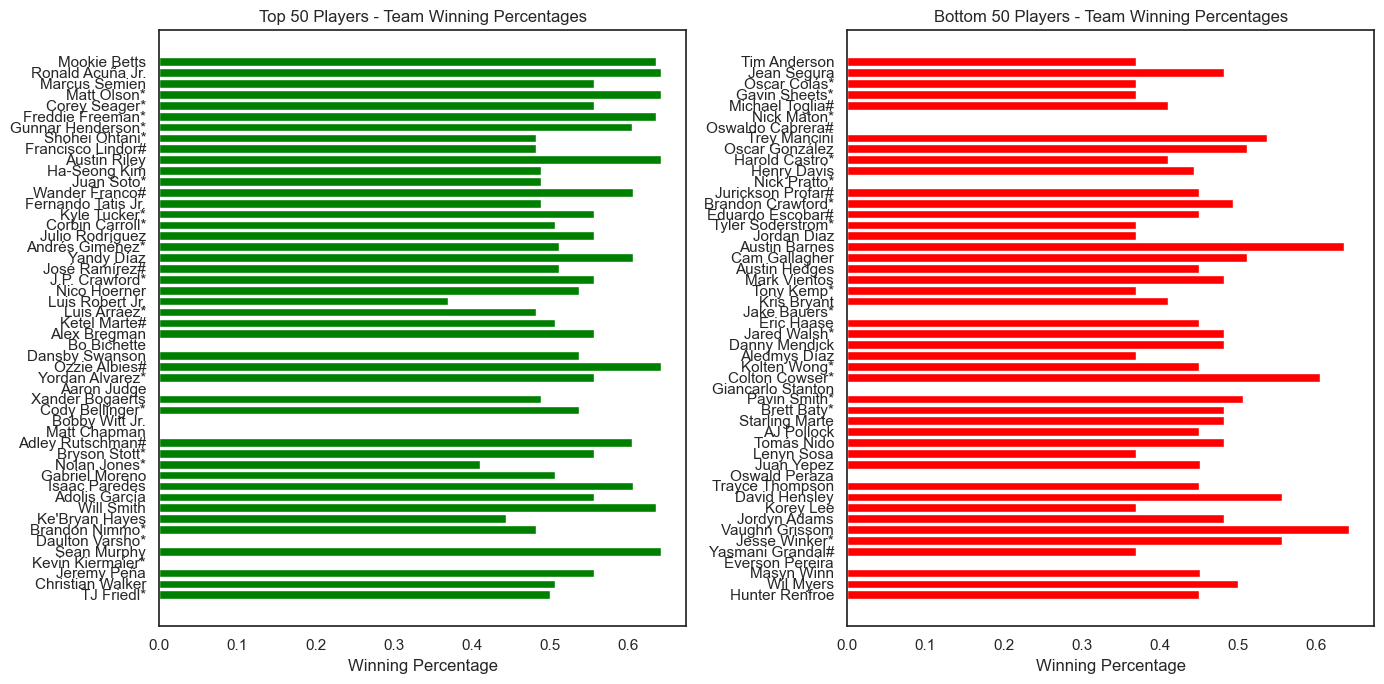

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation (as previously defined)
top_50_data = pd.DataFrame({
    'Name': ["Mookie Betts", "Ronald Acuña Jr.", "Marcus Semien", "Matt Olson*", "Corey Seager*", 
             "Freddie Freeman*", "Gunnar Henderson*", "Shohei Ohtani*", "Francisco Lindor#", "Austin Riley",
             "Ha-Seong Kim", "Juan Soto*", "Wander Franco#", "Fernando Tatis Jr.", "Kyle Tucker*",
             "Corbin Carroll*", "Julio Rodríguez", "Andrés Giménez*", "Yandy Díaz", "José Ramírez#",
             "J.P. Crawford*", "Nico Hoerner", "Luis Robert Jr.", "Luis Arráez*", "Ketel Marte#",
             "Alex Bregman", "Bo Bichette", "Dansby Swanson", "Ozzie Albies#", "Yordan Alvarez*",
             "Aaron Judge", "Xander Bogaerts", "Cody Bellinger*", "Bobby Witt Jr.", "Matt Chapman",
             "Adley Rutschman#", "Bryson Stott*", "Nolan Jones*", "Gabriel Moreno", "Isaac Paredes",
             "Adolis García", "Will Smith", "Ke'Bryan Hayes", "Brandon Nimmo*", "Daulton Varsho*",
             "Sean Murphy", "Kevin Kiermaier*", "Jeremy Peña", "Christian Walker", "TJ Friedl*"],
    'Tm': ["LAD", "ATL", "TEX", "ATL", "TEX", 
           "LAD", "BAL", "LAA", "NYM", "ATL",
           "SDP", "SDP", "TBR", "SDP", "HOU",
           "ARI", "SEA", "CLE", "TBR", "CLE",
           "SEA", "CHC", "CHW", "MIA", "ARI",
           "HOU", "TOR", "CHC", "ATL", "HOU",
           "NYY", "SDP", "CHC", "KCR", "TOR",
           "BAL", "PHI", "COL", "ARI", "TBR",
           "TEX", "LAD", "PIT", "NYM", "TOR",
           "ATL", "TOR", "HOU", "ARI", "CIN"]
})

bottom_50_data = pd.DataFrame({
    'Name': ["Tim Anderson", "Jean Segura", "Oscar Colás*", "Gavin Sheets*", "Michael Toglia#", 
             "Nick Maton*", "Oswaldo Cabrera#", "Trey Mancini", "Oscar González", "Harold Castro*",
             "Henry Davis", "Nick Pratto*", "Jurickson Profar#", "Brandon Crawford*", "Eduardo Escobar#",
             "Tyler Soderstrom*", "Jordan Diaz", "Austin Barnes", "Cam Gallagher", "Austin Hedges",
             "Mark Vientos", "Tony Kemp*", "Kris Bryant", "Jake Bauers*", "Eric Haase",
             "Jared Walsh*", "Danny Mendick", "Aledmys Díaz", "Kolten Wong*", "Colton Cowser*",
             "Giancarlo Stanton", "Pavin Smith*", "Brett Baty*", "Starling Marte", "AJ Pollock",
             "Tomás Nido", "Lenyn Sosa", "Juan Yepez", "Oswald Peraza", "Trayce Thompson", 
             "David Hensley", "Korey Lee", "Jordyn Adams", "Vaughn Grissom", "Jesse Winker*",
             "Yasmani Grandal#", "Everson Pereira", "Masyn Winn", "Wil Myers", "Hunter Renfroe"],
    'Tm': ["CHW", "MIA", "CHW", "CHW", "COL",
           "DET", "NYY", "CHC", "CLE", "COL",
           "PIT", "KCR", "2TM", "SFG", "2TM",
           "OAK", "OAK", "LAD", "CLE", "2TM",
           "NYM", "OAK", "COL", "NYY", "2TM",
           "LAA", "NYM", "OAK", "2TM", "BAL",
           "NYY", "ARI", "NYM", "NYM", "2TM",
           "NYM", "CHW", "STL", "NYY", "2TM",
           "HOU", "CHW", "LAA", "ATL", "MIL",
           "CHW", "NYY", "STL", "CIN", "2TM"]
})

team_winning_percentage = {
    'LAD': 0.636,
    'ATL': 0.642,
    'TEX': 0.556,
    'BAL': 0.605,
    'LAA': 0.482,
    'NYM': 0.482,
    'SDP': 0.488,
    'TBR': 0.606,
    'HOU': 0.556,
    'ARI': 0.507,
    'SEA': 0.556,
    'CLE': 0.512,
    'CHC': 0.537,
    'CHW': 0.370,
    'MIA': 0.482,
    'PHI': 0.556,
    'COL': 0.410,
    '2TM': 0.450,  # Averaged or generalized for teams with multiple teams
    'SFG': 0.494,
    'OAK': 0.370,
    'PIT': 0.444,
    'STL': 0.451,
    'CIN': 0.500,
    'MIL': 0.556
}

# Mapping team winning percentages to the top 50 and bottom 50 players
top_50_data['Actual_Winning_Percentage'] = top_50_data['Tm'].map(team_winning_percentage)
bottom_50_data['Actual_Winning_Percentage'] = bottom_50_data['Tm'].map(team_winning_percentage)

# Plotting the results
plt.figure(figsize=(14, 7))

# Top 50 Players
plt.subplot(1, 2, 1)
plt.barh(top_50_data['Name'], top_50_data['Actual_Winning_Percentage'], color='green')
plt.title('Top 50 Players - Team Winning Percentages')
plt.xlabel('Winning Percentage')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Bottom 50 Players
plt.subplot(1, 2, 2)
plt.barh(bottom_50_data['Name'], bottom_50_data['Actual_Winning_Percentage'], color='red')
plt.title('Bottom 50 Players - Team Winning Percentages')
plt.xlabel('Winning Percentage')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

plt.tight_layout()
plt.show()


The graph shows that both the top 50 and bottom 50 WAR players are associated with teams that achieve similar winning percentages. Despite the differences in individual WAR, the winning percentages for teams with these players are relatively close, suggesting that WAR, while important, is just one of many factors that contribute to a team's success. This reinforces the complexity of baseball, where a team's overall performance is not solely dependent on a few high-performing individuals but rather on a combination of many contributing factors.

An example of this is the league in which a team is placed in.

C:\Users\ethan\AppData\Local\Temp\ipykernel_21912\3950808192.py:37: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



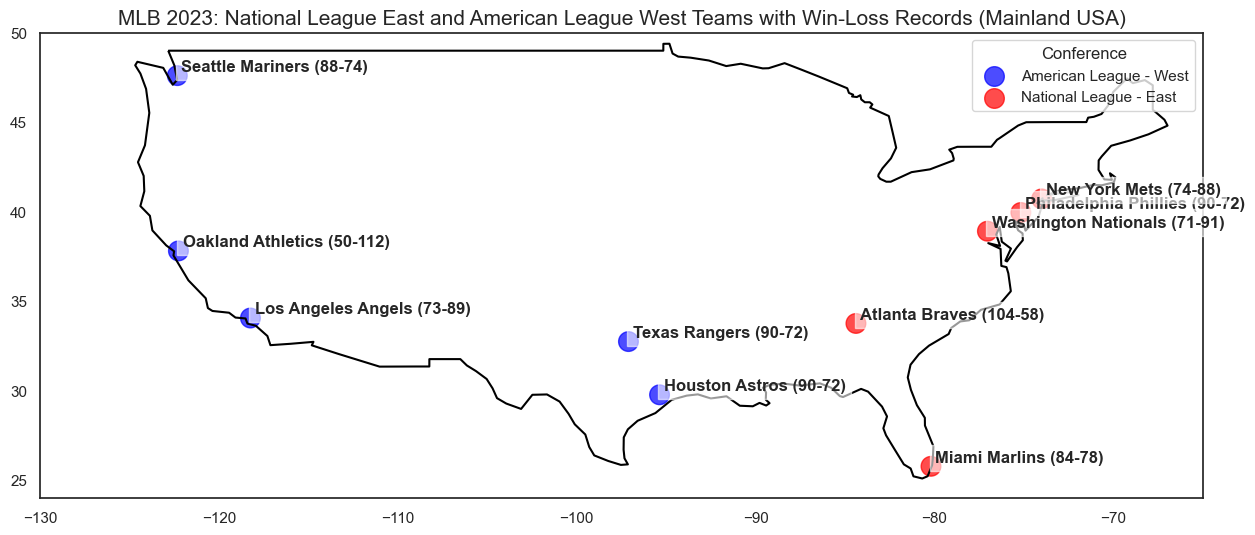

In [200]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Step 1: Create a DataFrame for the relevant MLB teams with win-loss records
data = {
    'Team': [
        'Atlanta Braves', 'Philadelphia Phillies', 'Miami Marlins', 'New York Mets', 'Washington Nationals', # NL East
        'Houston Astros', 'Texas Rangers', 'Seattle Mariners', 'Los Angeles Angels', 'Oakland Athletics' # AL West
    ],
    'City': [
        'Atlanta', 'Philadelphia', 'Miami', 'New York', 'Washington', # NL East
        'Houston', 'Arlington', 'Seattle', 'Los Angeles', 'Oakland' # AL West
    ],
    'Conference': [
        'National League - East', 'National League - East', 'National League - East', 'National League - East', 'National League - East', 
        'American League - West', 'American League - West', 'American League - West', 'American League - West', 'American League - West'
    ],
    'Latitude': [33.7490, 39.9526, 25.7617, 40.7128, 38.9072, # NL East
                 29.7604, 32.7357, 47.6062, 34.0522, 37.8044], # AL West
    'Longitude': [-84.3880, -75.1652, -80.1918, -74.0060, -77.0369, # NL East
                  -95.3698, -97.1081, -122.3321, -118.2437, -122.2711], # AL West
    'Win_Loss_Record_2023': [
        '104-58', '90-72', '84-78', '74-88', '71-91', # NL East
        '90-72', '90-72', '88-74', '73-89', '50-112' # AL West
    ]
}

df = pd.DataFrame(data)

# Step 2: Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Step 3: Load a map of the United States (continental only)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[(world.name == "United States of America") & (world.continent == "North America")]

# Step 4: Plot the map with the teams
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Restrict the plot to mainland USA only
usa.boundary.plot(ax=ax, color='black')
ax.set_xlim(-130, -65)  # Adjusted longitude limits for continental USA
ax.set_ylim(24, 50)     # Adjusted latitude limits for continental USA

# Color by conference
colors = {
    'National League - East': 'red', 
    'American League - West': 'blue'
}

# Size all markers equally
sizes = [200] * len(df)

# Plot the teams
for conference, group in gdf.groupby('Conference'):
    group.plot(ax=ax, color=colors[conference], markersize=sizes, label=conference, alpha=0.7)

# Annotate teams with their win-loss records
for idx, row in gdf.iterrows():
    ax.annotate(f"{row['Team']} ({row['Win_Loss_Record_2023']})", 
                xy=(row['Longitude'], row['Latitude']),
                xytext=(3, 3), textcoords='offset points', fontsize=12, fontweight='bold', 
                bbox=dict(facecolor='white', alpha=0.6))

# Step 5: Final touches
plt.title('MLB 2023: National League East and American League West Teams with Win-Loss Records (Mainland USA)', fontsize=15)
plt.legend(title='Conference')
plt.show()


While a player’s WAR is a crucial metric for assessing their contribution to a team’s success, the comparison between the Texas Rangers and Atlanta Braves demonstrates that the strength of competition within a league also plays a significant role. Despite having a lower regular-season record, the Rangers, who faced tougher competition in the American League West, performed better in the postseason and ultimately won the World Series. This suggests that WAR, while predictive of regular-season performance, must be considered alongside the level of competition and other factors that influence a team's resilience and success in critical moments. Therefore, while WAR is important, it is not the sole determinant of a team's winning chances, particularly in the postseason.

## Broader Report Conclusion

Connecting these results to the broader report question, it has been found that despite high WAR players performing at all-time levels, that does not necessarily correlate with a significantly higher team winning percentage. This is the same for low WAR players. This is likely due to the fact that good and bad players can play for good or bad teams. For example, most of the players seen in the high and low WAR datasets were drafted by the teams where they had their historically good or bad seasons. When a team drafts a player, they have at least six years of that player’s MLB career (assuming they don’t trade or cut the player) (MLB Standard States, n.d.), meaning if a historically good player is drafted by a historically bad team, it truly doesn’t matter how well that player performs if his positional and pitching teammates are unable to perform as well.

Furthermore, the types of players in low WAR can also explain the lack of correlation between team winning percentage and WAR. When analysing what kind of players were on the list, two major patterns occurred. The most common types of players were ageing superstars and young players with perceived potential. For example, Giancarlo Stanton, Kris Bryant and Henry Davis appeared on the low WAR list. Stanton aged 33 and Bryant aged 31 in the 2023 season, had MVP seasons of the mid 2010s. 

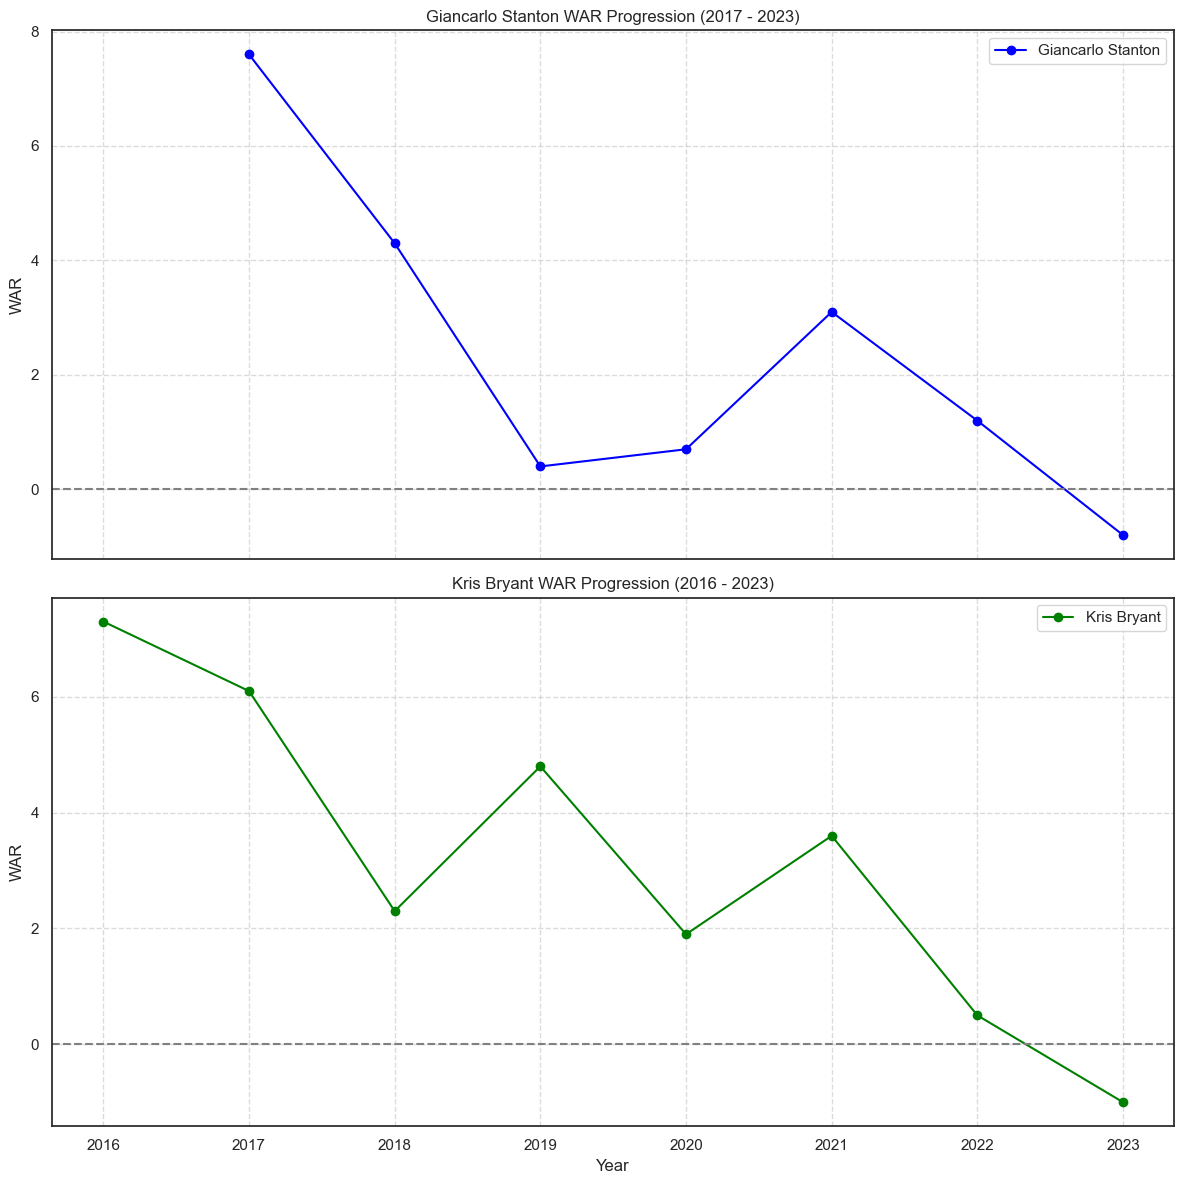

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

# Giancarlo Stanton WAR Data (MVP in 2017)
stanton_war_data = {
    "Year": [2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "WAR": [7.6, 4.3, 0.4, 0.7, 3.1, 1.2, -0.8]
}

# Kris Bryant WAR Data (MVP in 2016)
bryant_war_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "WAR": [7.3, 6.1, 2.3, 4.8, 1.9, 3.6, 0.5, -1.0]
}

# Creating DataFrames
stanton_df = pd.DataFrame(stanton_war_data)
bryant_df = pd.DataFrame(bryant_war_data)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Stanton graph
axs[0].plot(stanton_df["Year"], stanton_df["WAR"], marker='o', linestyle='-', color='blue', label='Giancarlo Stanton')
axs[0].set_title('Giancarlo Stanton WAR Progression (2017 - 2023)')
axs[0].set_ylabel('WAR')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].axhline(0, color='gray', linestyle='--')

# Bryant graph
axs[1].plot(bryant_df["Year"], bryant_df["WAR"], marker='o', linestyle='-', color='green', label='Kris Bryant')
axs[1].set_title('Kris Bryant WAR Progression (2016 - 2023)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('WAR')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].axhline(0, color='gray', linestyle='--')

# Adjust layout
plt.tight_layout()

plt.show()


 Davis, on the other hand, was a first-overall pick in the 2021 draft, making his rookie Debute in 2023 and was continuously played, despite his poor performances, due to his ‘potential’. Both player groups accumulated negative WAR, however, the way in which they achieved it was vastly different, with their season expectations also contrasting.

# WAR vs WPA

In [94]:

file_path = "WPA_2023.csv"

if os.path.isfile(file_path):
    print("loading from file")
    try:
        WPA_2023 = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        WPA_2023 = pd.read_csv(file_path, encoding='ISO-8859-1')
else:
    print("loading from the internet")
    url = "https://www.baseball-reference.com/leagues/majors/2023-win_probability-batting.shtml"
    response = requests.get(url)
    
    if response.status_code == 200:
        tables = pd.read_html(response.text)
        
        # Assuming the first table on the page is the one we want
        WPA_2023 = tables[0]
        
        # Save the table as a CSV file for future use
        WPA_2023.to_csv(file_path, index=False, encoding='utf-8')
    else:
        print("Failed to retrieve data from the internet.")
        WPA_2023 = pd.DataFrame()  # Return an empty DataFrame in case of failure

print("done")


loading from file
done


### Explanation of WPA

WPA is simpler to calculate. It reflects a player’s contribution to their team’s win probability at any moment in a game. For example, if a player steps up to bat with a 20% chance of his team winning, and the result of his at-bat leads to a win, he earns 0.8 WPA. Conversely, the pitcher responsible for the loss receives -0.8 WPA. WPA over a season sums all events where a player influenced the win probability (Slowinski, 2010). For instance, Babe Ruth's 1929 WPA of 9.4 indicates he improved his team’s win probability by 940% that season (Baseball Reference, n.d.).



In [152]:
import pandas as pd
import os

# Define the file path for the WPA_2023 dataset
file_path = "WPA_2023.csv"

# Load the CSV file
if os.path.isfile(file_path):
    print("Loading from file")
    try:
        WPA_2023 = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        WPA_2023 = pd.read_csv(file_path, encoding='ISO-8859-1')
else:
    print("File not found")
    WPA_2023 = pd.DataFrame()  # Return an empty DataFrame in case of failure

# Create a subset of the data for demonstration
df2 = WPA_2023.head(10)

# Simple display without any color or extra styling
styled_df = df2.style.set_caption("Simple Table of WPA_2023 Dataset")

# Display the styled DataFrame
styled_df


Loading from file


,Rk,Name,Age,PA,Tm,BtRuns,BtWins,Plays,WPA,WPA+,WPA-,aLI,WPA/LI,Clutch,cWPA,cWPA+,cWPA-,acLI,cClutch,RE24,REW,boLI,RE24/boLI,PHlev,AB,Name-additional
0,1,CJ Abrams*,22,614,WSN,-5.000000,-0.500000,670,-1.000000,11.400000,-12.400000,1.080000,0.000000,-0.900000,-0.20%,1.70%,-1.90%,0.260000,-0.40%,-3.600000,-0.400000,0.970000,1.400000,2.190000,1,abramcj01
1,2,José Abreu,36,594,HOU,-10.300000,-1.000000,602,-1.200000,10.200000,-11.400000,1.030000,-1.100000,-0.100000,-0.60%,11.00%,-11.60%,1.750000,0.30%,-2.100000,-0.200000,1.000000,-11.700000,nan,0,abreujo02
2,3,Wilyer Abreu*,24,85,BOS,3.600000,0.400000,89,-0.100000,1.400000,-1.500000,1.060000,0.200000,-0.300000,-0.10%,0.20%,-0.20%,0.240000,-0.30%,4.800000,0.500000,0.950000,4.400000,1.800000,6,abreuwi02
3,4,Ronald Acuña Jr.,25,735,ATL,63.500000,6.000000,843,6.800000,17.000000,-10.200000,0.930000,6.200000,1.200000,2.50%,7.00%,-4.50%,0.660000,0.30%,73.500000,6.900000,0.950000,73.400000,nan,0,acunaro01
4,5,Willy Adames,27,638,MIL,-3.000000,-0.300000,651,-0.700000,10.700000,-11.400000,0.990000,-0.400000,-0.400000,-0.60%,6.40%,-7.00%,1.000000,-0.50%,-7.100000,-0.700000,0.930000,-5.600000,nan,0,adamewi01
5,6,Jordyn Adams,23,40,LAA,-7.100000,-0.700000,45,-0.500000,0.400000,-0.900000,1.010000,-0.500000,0.100000,0.00%,0.00%,0.00%,0.050000,-0.20%,-6.100000,-0.600000,0.850000,-6.600000,0.010000,2,adamsjo03
6,7,Riley Adams,27,158,WSN,4.200000,0.400000,159,0.100000,2.400000,-2.300000,0.840000,-0.100000,0.300000,0.00%,0.30%,-0.30%,0.160000,0.30%,2.100000,0.200000,0.930000,1.500000,1.480000,3,adamsri03
7,8,Jo Adell,24,62,LAA,-1.400000,-0.100000,63,0.100000,0.900000,-0.900000,0.750000,-0.200000,0.300000,0.00%,0.10%,-0.10%,0.190000,-0.10%,-0.100000,0.000000,0.870000,-2.400000,nan,1,adelljo01
8,9,Ehire Adrianza#,33,11,ATL,-2.500000,-0.300000,11,-0.200000,0.000000,-0.200000,0.940000,-0.200000,0.000000,-0.20%,0.00%,-0.20%,1.190000,0.00%,-2.200000,-0.200000,0.880000,-2.800000,1.140000,3,adriaeh01
9,10,Jesús Aguilar,33,115,OAK,-1.700000,-0.200000,115,-0.700000,1.600000,-2.300000,0.990000,-0.200000,-0.400000,0.00%,0.50%,-0.60%,0.420000,-0.10%,-7.300000,-0.700000,0.940000,-3.600000,1.410000,6,aguilje01


In [203]:
import pandas as pd

def get_top_50_names(data):
    try:
        # Extract and rename columns 2, 3, and 16
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_3 = data.iloc[:, 2].rename("Age")     # Column 3 (index 2)
        column_16 = data.iloc[:, 15].rename("WAR")   # Column 16 (index 15)
        
        # Combine the three columns into a new DataFrame
        combined_data = pd.DataFrame({
            'Player': column_2,
            'Age': column_3,
            'WAR': column_16
        })
        
        # Sort the data based on column 16 (WAR) in descending order
        sorted_data = combined_data.sort_values(by='WAR', ascending=False)
        
        # Retrieve the top 50 rows based on column 16 (WAR)
        top_50 = sorted_data.head(50).reset_index(drop=True)
        
        return top_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_names_in_another_csv(names_df, filepath):
    try:
        # Load the second CSV file
        data = pd.read_csv(filepath, encoding='latin1')
        
        # Extract and rename column 9 (assuming it's named "WPA")
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        # Combine the relevant columns into a new DataFrame
        matching_data = data[[data.columns[1], column_9.name]]  # Column 2 and column 9
        matching_data = matching_data.rename(columns={data.columns[1]: "Player"})
        
        # Filter the rows where the names match
        matching_rows = names_df.merge(matching_data, on='Player', how='left')
        
        # Display the matching rows in a styled table
        styled_matching_rows = matching_rows.style.set_caption("Matching Rows from WPA_2023 Dataset").set_table_styles([
            {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
            {'selector': 'th', 'props': 'font-weight: bold;'},
        ])
        
        return styled_matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Load the first CSV and get the top 50 names with their WAR values and Age
data = pd.read_csv("WAR_2023.csv", encoding='latin1')
top_50 = get_top_50_names(data)

if top_50 is not None:
    # Find matching names in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_names_in_another_csv(top_50, second_csv_filepath)
    
    if matching_rows is not None:
        display(matching_rows)
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract top 50 names.")


,Player,Age,WAR,WPA
0,Mookie Betts,30,8.300000,4.900000
1,Ronald Acuña Jr.,25,8.200000,6.800000
2,Marcus Semien,32,7.400000,1.000000
3,Matt Olson*,29,7.400000,4.400000
4,Corey Seager*,29,6.900000,4.400000
5,Freddie Freeman*,33,6.500000,4.300000
6,Gunnar Henderson*,22,6.200000,1.300000
7,Shohei Ohtani*,28,6.000000,4.200000
8,Francisco Lindor#,29,6.000000,1.400000
9,Austin Riley,26,5.900000,1.900000


In [204]:
import pandas as pd

def get_bottom_50_unique_names(data):
    try:
        # Extract and rename columns 2, 3, and 16
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_3 = data.iloc[:, 2].rename("Age")     # Column 3 (index 2)
        column_16 = data.iloc[:, 15].rename("WAR")   # Column 16 (index 15)
        
        # Combine the three columns into a new DataFrame
        combined_data = pd.DataFrame({
            'Player': column_2,
            'Age': column_3,
            'WAR': column_16
        })
        
        # Sort the data based on column 16 (WAR) in ascending order
        sorted_data = combined_data.sort_values(by='WAR', ascending=True)
        
        # Drop duplicates to ensure uniqueness
        unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
        
        # Retrieve the bottom 50 unique rows based on column 16 (WAR)
        bottom_50 = unique_sorted_data.head(50)
        
        return bottom_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_wpa_for_bottom_50_war(bottom_50_df, filepath):
    try:
        # Load the second CSV file
        data = pd.read_csv(filepath, encoding='latin1')
        
        # Extract and rename column 9 (assuming it's named "WPA")
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        # Combine the relevant columns into a new DataFrame
        matching_data = pd.DataFrame({
            'Player': data.iloc[:, 1],  # Column 2 (index 1)
            'WPA': column_9
        })
        
        # Filter the rows where the names match
        matching_rows = bottom_50_df.merge(matching_data, on='Player', how='left')
        
        # Display the matching rows in a styled table
        styled_matching_rows = matching_rows.style.set_caption("Bottom 50 Unique WAR Players with WPA from WPA_2023 Dataset").set_table_styles([
            {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold;'},
            {'selector': 'th', 'props': 'font-weight: bold;'},
        ])
        
        return styled_matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Load the first CSV and get the bottom 50 unique WAR players with their Age
data = pd.read_csv("WAR_2023.csv", encoding='latin1')
bottom_50 = get_bottom_50_unique_names(data)

if bottom_50 is not None:
    # Find the WPA for the bottom 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_bottom_50_war(bottom_50, second_csv_filepath)
    
    if matching_rows is not None:
        display(matching_rows)
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract bottom 50 names.")


,Player,Age,WAR,WPA
0,Tim Anderson,30,-2.000000,-4.100000
1,Jean Segura,33,-1.900000,-1.700000
2,Oscar Colás*,24,-1.500000,-2.200000
3,Gavin Sheets*,27,-1.500000,-0.600000
4,Michael Toglia#,24,-1.500000,-1.300000
5,Nick Maton*,26,-1.500000,-0.600000
6,Oswaldo Cabrera#,24,-1.500000,-0.600000
7,Trey Mancini,31,-1.400000,-0.900000
8,Oscar González,25,-1.400000,-1.700000
9,Harold Castro*,29,-1.400000,-1.300000


In [213]:
import pandas as pd

# Define the data
ratings = ['Excellent', 'Great', 'Above Average', 'Average', 'Below Average', 'Poor', 'Awful']
wpa = [+6.0, +3.0, +2.0, +1.0, 0.0, -1.0, -3.0]

# Create a DataFrame
df = pd.DataFrame({'Rating': ratings, 'WPA': wpa})

# Style the DataFrame with color and other enhancements, including black text inside the table
styled_table = df.style.set_caption(
    "Rating vs WPA"
).set_table_styles([
    {'selector': 'caption', 'props': 'caption-side: top; font-weight: bold; font-size: 16px;'},
    {'selector': 'th', 'props': 'background-color: #4CAF50; color: white; font-weight: bold; text-align: left;'},
    {'selector': 'td', 'props': 'padding: 10px; text-align: left; background-color: lavender; color: black;'},  # Ensuring black text
]).background_gradient(
    subset=['WPA'], cmap='coolwarm'
)

# Display the styled table in a Jupyter Notebook or save it to HTML
styled_table


,Rating,WPA
0,Excellent,6.000000
1,Great,3.000000
2,Above Average,2.000000
3,Average,1.000000
4,Below Average,0.000000
5,Poor,-1.000000
6,Awful,-3.000000


In [96]:
import pandas as pd
import plotly.express as px
import os

def get_top_50_unique_names(data):
    column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
    column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
    combined_data = pd.DataFrame({'Player': column_2, 'WAR': column_16})
    sorted_data = combined_data.sort_values(by='WAR', ascending=False)
    unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
    top_50 = unique_sorted_data.head(50)
    return top_50

def find_wpa_for_top_50_war(top_50_df, filepath):
    data = pd.read_csv(filepath, encoding='latin1')
    column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
    matching_data = pd.DataFrame({'Player': data.iloc[:, 1], 'WPA': column_9}).drop_duplicates(subset='Player')
    matching_rows = top_50_df.merge(matching_data, on='Player', how='left')
    return matching_rows

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        data = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            data = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            data = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if data.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

# Get the top 50 unique WAR players
top_50 = get_top_50_unique_names(data)

if top_50 is not None:
    # Find the WPA for the top 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_top_50_war(top_50, second_csv_filepath)
    
    if matching_rows is not None and not matching_rows.empty:
        # Extract the WPA values
        wpa_values = matching_rows['WPA'].dropna()

        # Categorize the WPA values based on the provided ratings
        def categorize_wpa(wpa):
            if wpa >= 6.0:
                return 'Excellent'
            elif wpa >= 3.0:
                return 'Great'
            elif wpa >= 2.0:
                return 'Above Average'
            elif wpa >= 1.0:
                return 'Average'
            elif wpa >= 0.0:
                return 'Below Average'
            elif wpa >= -1.0:
                return 'Poor'
            else:
                return 'Awful'

        wpa_categories = wpa_values.apply(categorize_wpa)
        wpa_category_counts = wpa_categories.value_counts()

        # Ensure the categories are in the correct order
        categories_order = ['Excellent', 'Great', 'Above Average', 'Average', 'Below Average', 'Poor', 'Awful']
        wpa_category_counts = wpa_category_counts.reindex(categories_order, fill_value=0)

        # Create a DataFrame for the pie chart
        pie_data = pd.DataFrame({'Rating': wpa_category_counts.index, 'Count': wpa_category_counts.values})

        # Create an interactive pie chart using Plotly
        fig_pie = px.pie(pie_data, names='Rating', values='Count', title='Distribution of WPA Ratings for Top 50 WAR Players')

        # Update the layout for interactivity
        fig_pie.update_traces(textinfo='percent+label', hoverinfo='label+percent+value', 
                              marker=dict(line=dict(color='#000000', width=2)))

        # Show the pie chart
        fig_pie.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract top 50 names.")


In [97]:
import pandas as pd
import plotly.express as px
import os

def get_bottom_50_unique_names(data):
    column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
    column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
    combined_data = pd.DataFrame({'Player': column_2, 'WAR': column_16})
    sorted_data = combined_data.sort_values(by='WAR', ascending=True)
    unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
    bottom_50 = unique_sorted_data.head(50)
    return bottom_50

def find_wpa_for_bottom_50_war(bottom_50_df, filepath):
    data = pd.read_csv(filepath, encoding='latin1')
    column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
    matching_data = pd.DataFrame({'Player': data.iloc[:, 1], 'WPA': column_9}).drop_duplicates(subset='Player')
    matching_rows = bottom_50_df.merge(matching_data, on='Player', how='left')
    return matching_rows

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        data = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            data = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            data = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if data.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

# Get the bottom 50 unique WAR players
bottom_50 = get_bottom_50_unique_names(data)

if bottom_50 is not None:
    # Find the WPA for the bottom 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_bottom_50_war(bottom_50, second_csv_filepath)
    
    if matching_rows is not None and not matching_rows.empty:
        # Extract the WPA values
        wpa_values = matching_rows['WPA'].dropna()

        # Categorize the WPA values based on the provided ratings
        def categorize_wpa(wpa):
            if wpa >= 6.0:
                return 'Excellent'
            elif wpa >= 3.0:
                return 'Great'
            elif wpa >= 2.0:
                return 'Above Average'
            elif wpa >= 1.0:
                return 'Average'
            elif wpa >= 0.0:
                return 'Below Average'
            elif wpa >= -1.0:
                return 'Poor'
            else:
                return 'Awful'

        wpa_categories = wpa_values.apply(categorize_wpa)
        wpa_category_counts = wpa_categories.value_counts()

        # Ensure the categories are in the correct order
        categories_order = ['Excellent', 'Great', 'Above Average', 'Average', 'Below Average', 'Poor', 'Awful']
        wpa_category_counts = wpa_category_counts.reindex(categories_order, fill_value=0)

        # Create a DataFrame for the pie chart
        pie_data = pd.DataFrame({'Rating': wpa_category_counts.index, 'Count': wpa_category_counts.values})

        # Create an interactive pie chart using Plotly
        fig_pie = px.pie(pie_data, names='Rating', values='Count', title='Distribution of WPA Ratings for Bottom 50 WAR Players')

        # Update the layout for interactivity
        fig_pie.update_traces(textinfo='percent+label', hoverinfo='label+percent+value', 
                              marker=dict(line=dict(color='#000000', width=2)))

        # Show the pie chart
        fig_pie.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract bottom 50 names.")


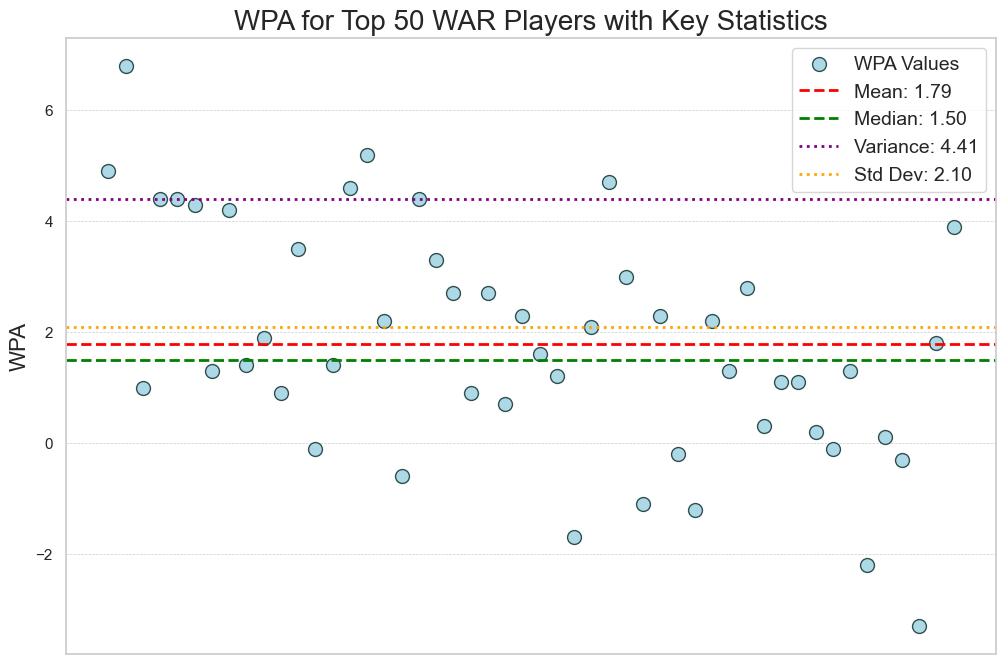

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

def get_top_50_unique_names(data):
    try:
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
        
        combined_data = pd.DataFrame({
            'Player': column_2,
            'WAR': column_16
        })
        
        sorted_data = combined_data.sort_values(by='WAR', ascending=False)
        unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
        top_50 = unique_sorted_data.head(50)
        
        return top_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_wpa_for_top_50_war(top_50_df, filepath):
    try:
        data = pd.read_csv(filepath, encoding='latin1')
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        matching_data = pd.DataFrame({
            'Player': data.iloc[:, 1],  # Column 2 (index 1)
            'WPA': column_9
        }).drop_duplicates(subset='Player')  # Drop duplicates to ensure uniqueness
        
        matching_rows = top_50_df.merge(matching_data, on='Player', how='left')
        
        return matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Define the paths to your CSV files
war_csv_file_path = 'WAR_2023.csv'
wpa_csv_file_path = 'WPA_2023.csv'

# Load the WAR data from the first CSV file
war_data = pd.read_csv(war_csv_file_path, encoding='latin1')

# Get the top 50 unique WAR players
top_50 = get_top_50_unique_names(war_data)

if top_50 is not None:
    # Find the WPA for the top 50 WAR players in the WPA CSV
    matching_rows = find_wpa_for_top_50_war(top_50, wpa_csv_file_path)
    
    if matching_rows is not None and not matching_rows.empty:
        # Calculate statistics for WPA values
        wpa_values = matching_rows['WPA'].dropna()
        wpa_mean = wpa_values.mean()
        wpa_median = wpa_values.median()
        wpa_variance = wpa_values.var()
        wpa_std_dev = wpa_values.std()

        # Plotting the WPA values with Matplotlib
        plt.figure(figsize=(12, 8))
        plt.scatter(range(len(wpa_values)), wpa_values, color='lightblue', edgecolor='DarkSlateGrey', s=100, label='WPA Values')

        # Plot horizontal lines for statistics
        plt.axhline(y=wpa_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {wpa_mean:.2f}')
        plt.axhline(y=wpa_median, color='green', linestyle='--', linewidth=2, label=f'Median: {wpa_median:.2f}')
        plt.axhline(y=wpa_variance, color='purple', linestyle=':', linewidth=2, label=f'Variance: {wpa_variance:.2f}')
        plt.axhline(y=wpa_std_dev, color='orange', linestyle=':', linewidth=2, label=f'Std Dev: {wpa_std_dev:.2f}')

        # Adding titles and labels
        plt.title('WPA for Top 50 WAR Players with Key Statistics', fontsize=20)
        plt.ylabel('WPA', fontsize=16)
        plt.xticks([])  # Remove x-axis labels
        plt.legend(fontsize=14)

        # Adding gridlines
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Display the plot
        plt.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract top 50 names.")


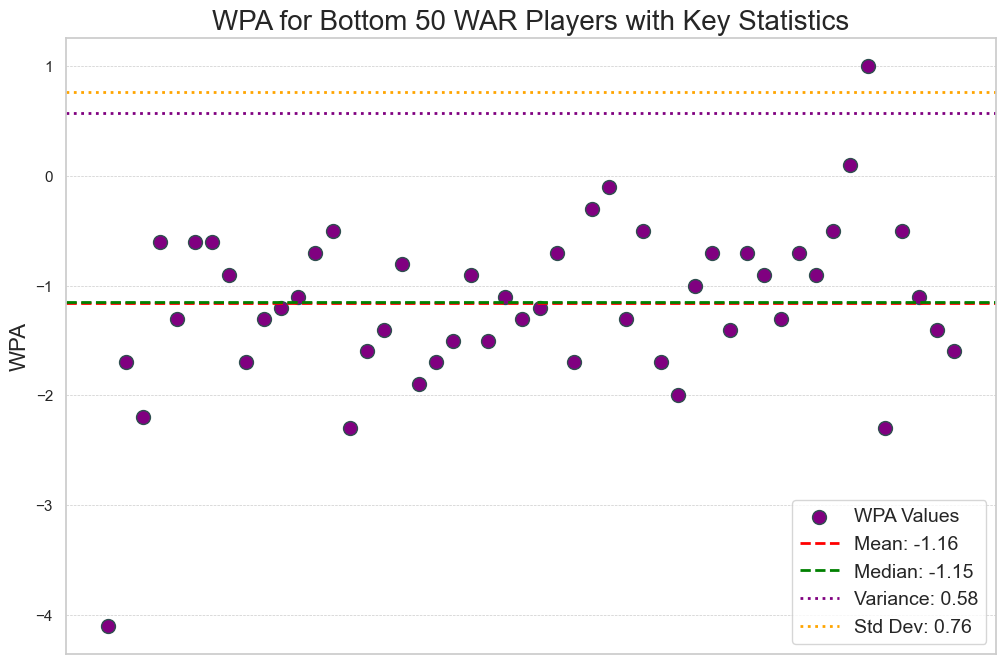

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

def get_bottom_50_unique_names(data):
    try:
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
        
        combined_data = pd.DataFrame({
            'Player': column_2,
            'WAR': column_16
        })
        
        # Sort the data based on column 16 (WAR) in ascending order to get the bottom players
        sorted_data = combined_data.sort_values(by='WAR', ascending=True)
        unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
        bottom_50 = unique_sorted_data.head(50)
        
        return bottom_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_wpa_for_bottom_50_war(bottom_50_df, filepath):
    try:
        data = pd.read_csv(filepath, encoding='latin1')
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        matching_data = pd.DataFrame({
            'Player': data.iloc[:, 1],  # Column 2 (index 1)
            'WPA': column_9
        }).drop_duplicates(subset='Player')  # Drop duplicates to ensure uniqueness
        
        matching_rows = bottom_50_df.merge(matching_data, on='Player', how='left')
        
        return matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Define the paths to your CSV files
war_csv_file_path = 'WAR_2023.csv'
wpa_csv_file_path = 'WPA_2023.csv'

# Load the WAR data from the first CSV file
war_data = pd.read_csv(war_csv_file_path, encoding='latin1')

# Get the bottom 50 unique WAR players
bottom_50 = get_bottom_50_unique_names(war_data)

if bottom_50 is not None:
    # Find the WPA for the bottom 50 WAR players in the WPA CSV
    matching_rows = find_wpa_for_bottom_50_war(bottom_50, wpa_csv_file_path)
    
    if matching_rows is not None and not matching_rows.empty:
        # Calculate statistics for WPA values
        wpa_values = matching_rows['WPA'].dropna()
        wpa_mean = wpa_values.mean()
        wpa_median = wpa_values.median()
        wpa_variance = wpa_values.var()
        wpa_std_dev = wpa_values.std()

        # Plotting the WPA values with Matplotlib
        plt.figure(figsize=(12, 8))
        plt.scatter(range(len(wpa_values)), wpa_values, color='purple', edgecolor='DarkSlateGrey', s=100, label='WPA Values')

        # Plot horizontal lines for statistics
        plt.axhline(y=wpa_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {wpa_mean:.2f}')
        plt.axhline(y=wpa_median, color='green', linestyle='--', linewidth=2, label=f'Median: {wpa_median:.2f}')
        plt.axhline(y=wpa_variance, color='purple', linestyle=':', linewidth=2, label=f'Variance: {wpa_variance:.2f}')
        plt.axhline(y=wpa_std_dev, color='orange', linestyle=':', linewidth=2, label=f'Std Dev: {wpa_std_dev:.2f}')

        # Adding titles and labels
        plt.title('WPA for Bottom 50 WAR Players with Key Statistics', fontsize=20)
        plt.ylabel('WPA', fontsize=16)
        plt.xticks([])  # Remove x-axis labels
        plt.legend(fontsize=14)

        # Adding gridlines
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Display the plot
        plt.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract bottom 50 names.")


Connecting WAR and WPA offers a clear comparison. While WAR reflects a player’s overall value across a season, WPA specifically measures their impact on their team’s chances of winning in individual games. Better players are naturally more likely to improve their team’s win probability, as WPA tracks how their actions contribute to potential victories, regardless of the game’s final outcome. For instance, a player might boost his team’s winning chances by 50% (0.5 WPA) in each game, even if the team ultimately loses. Conversely, players with low WAR typically hinder their team’s success, as negative contributions in batting, fielding, and baserunning occur in critical moments that could decide the game. Thus, WAR and WPA correlate closely: good players consistently make positive contributions that help their team, while poor performers frequently make negative plays that undermine their team’s chances of winning.

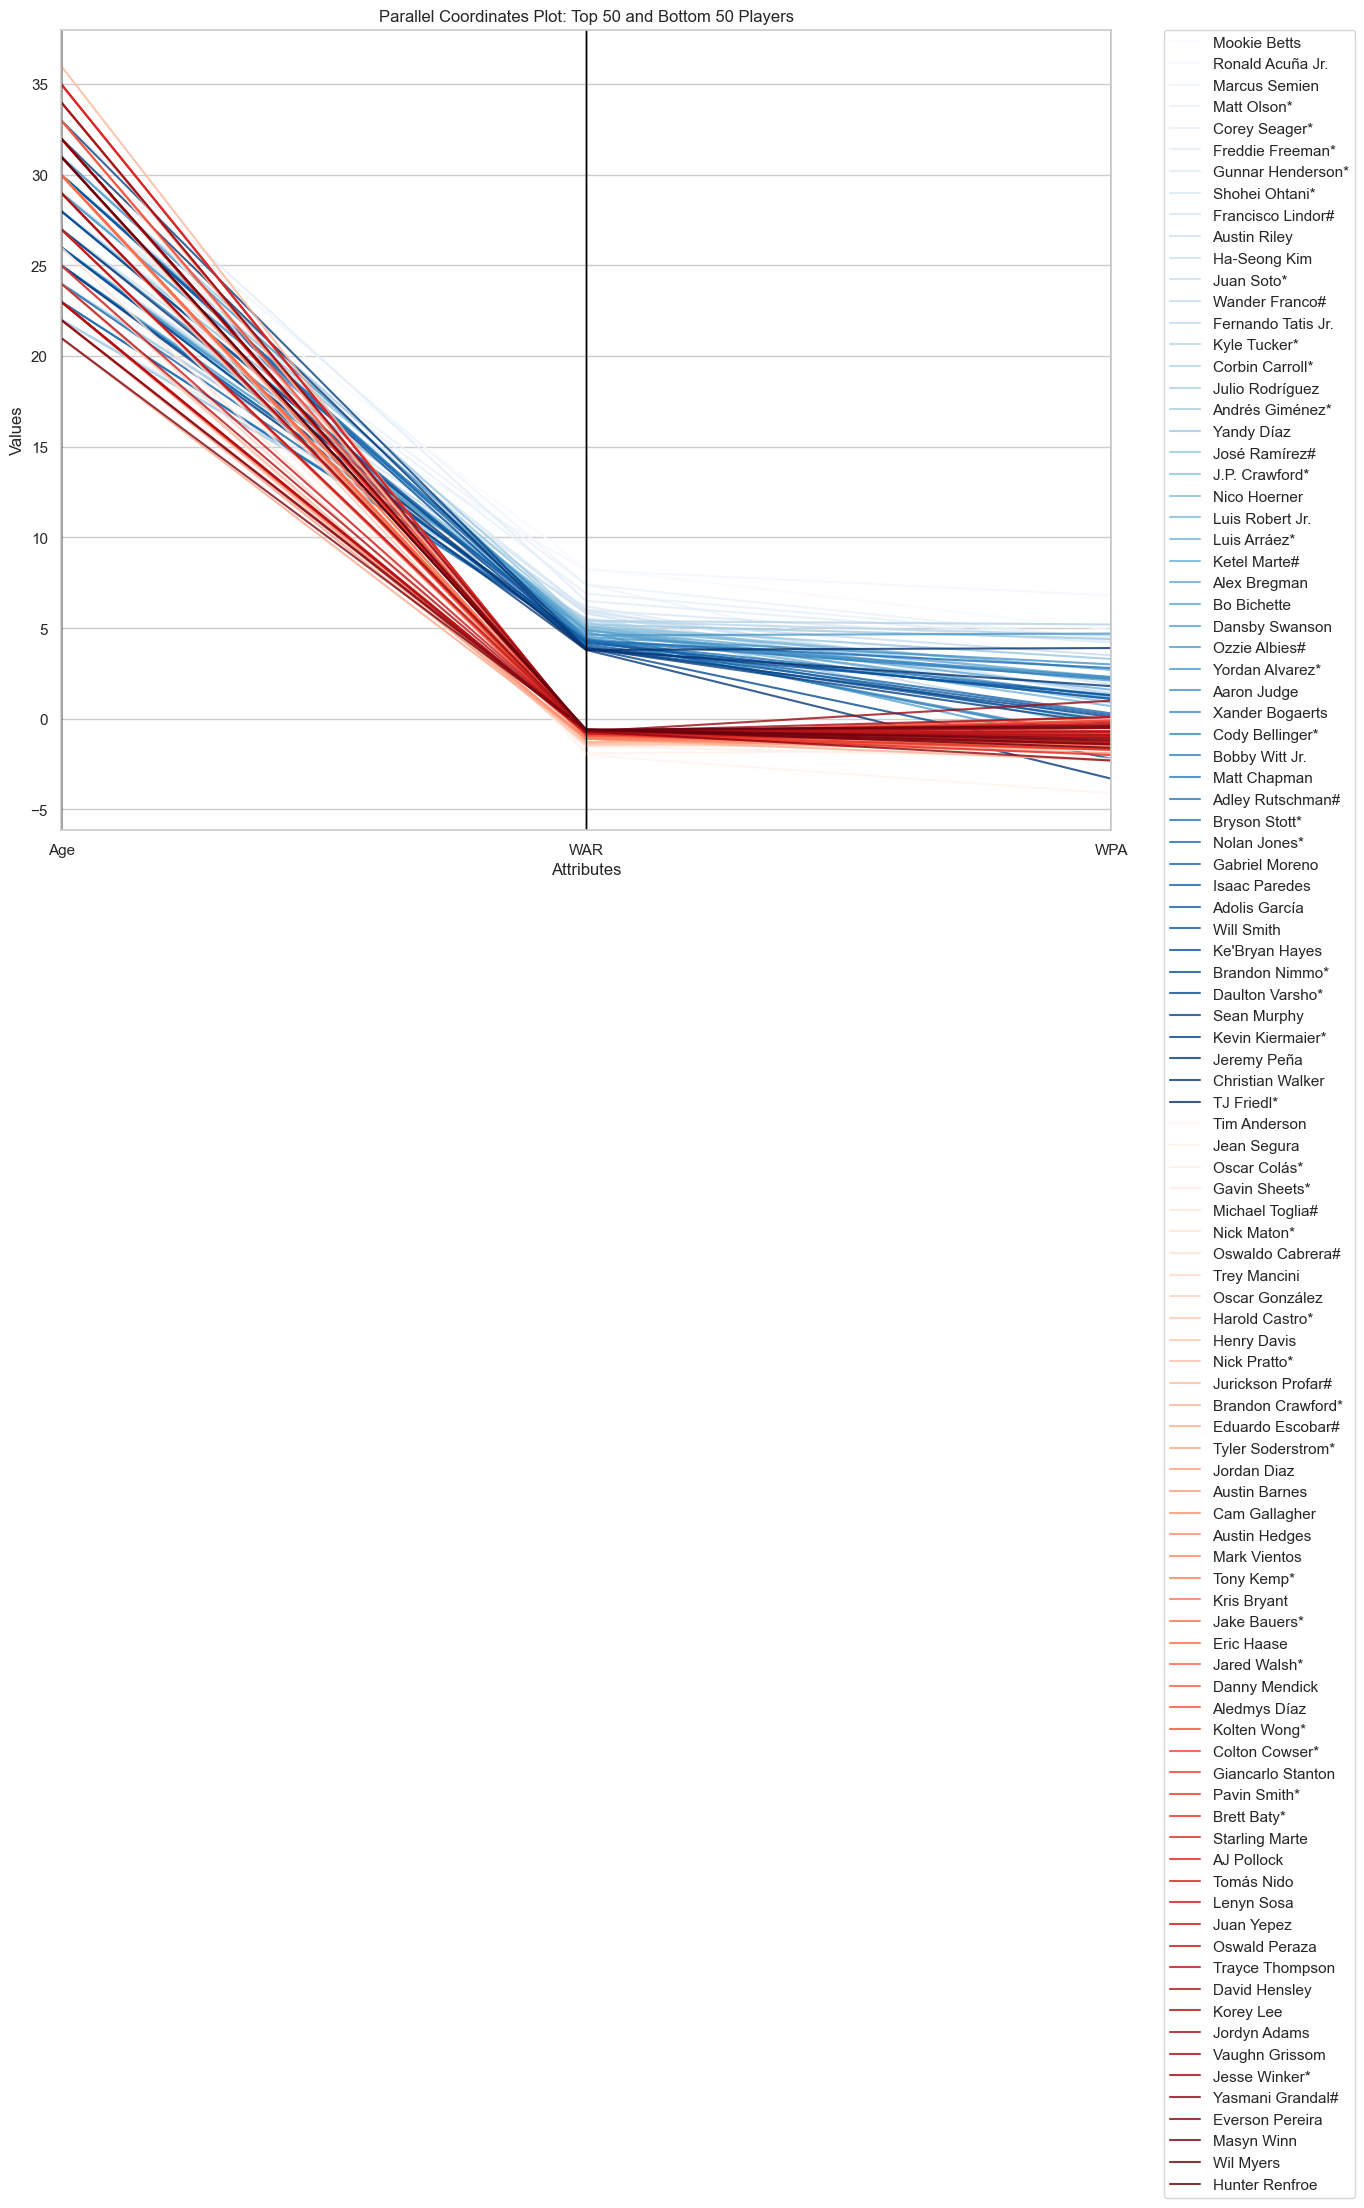

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Your existing functions for loading and processing data...

# Load the first CSV and get the top 50 and bottom 50 WAR players
data = pd.read_csv("WAR_2023.csv", encoding='latin1')
top_50 = get_top_50_names(data)
bottom_50 = get_bottom_50_unique_names(data)

if top_50 is not None and bottom_50 is not None:
    # Find the WPA for the top and bottom 50 WAR players
    second_csv_filepath = "WPA_2023.csv"
    top_50_with_wpa = find_wpa(top_50, second_csv_filepath)
    bottom_50_with_wpa = find_wpa(bottom_50, second_csv_filepath)
    
    if top_50_with_wpa is not None and bottom_50_with_wpa is not None:
        # Combine top and bottom 50 data into one DataFrame
        combined_data = pd.concat([top_50_with_wpa, bottom_50_with_wpa], axis=0).reset_index(drop=True)
        
        # Plotting the parallel coordinates
        plt.figure(figsize=(14, 10))  # Increase the figure size
        
        # Plot top 50 WPA players with one color (e.g., blue)
        parallel_coordinates(top_50_with_wpa, "Player", colormap=plt.get_cmap("Blues"), alpha=0.8)
        
        # Plot bottom 50 WPA players with another color (e.g., red)
        parallel_coordinates(bottom_50_with_wpa, "Player", colormap=plt.get_cmap("Reds"), alpha=0.8)
        
        # Adding title and labels
        plt.title("Parallel Coordinates Plot: Top 50 and Bottom 50 Players")
        plt.xlabel("Attributes")
        plt.ylabel("Values")
        
        # Position the legend outside the plot area
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        
        # Adjust the plot area to make room for the legend and other elements
        plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)
        
        # Show plot
        plt.show()
        
    else:
        print("No matching WPA data found or an error occurred.")
else:
    print("Could not extract top or bottom 50 names.")


# Analysis of WAR's Impact on Team Winning Percentage and WPA

After carrying out both tests for WAR’s impact on team winning percentage and WAR’s impact on WPA, a few glaring concepts were exposed.

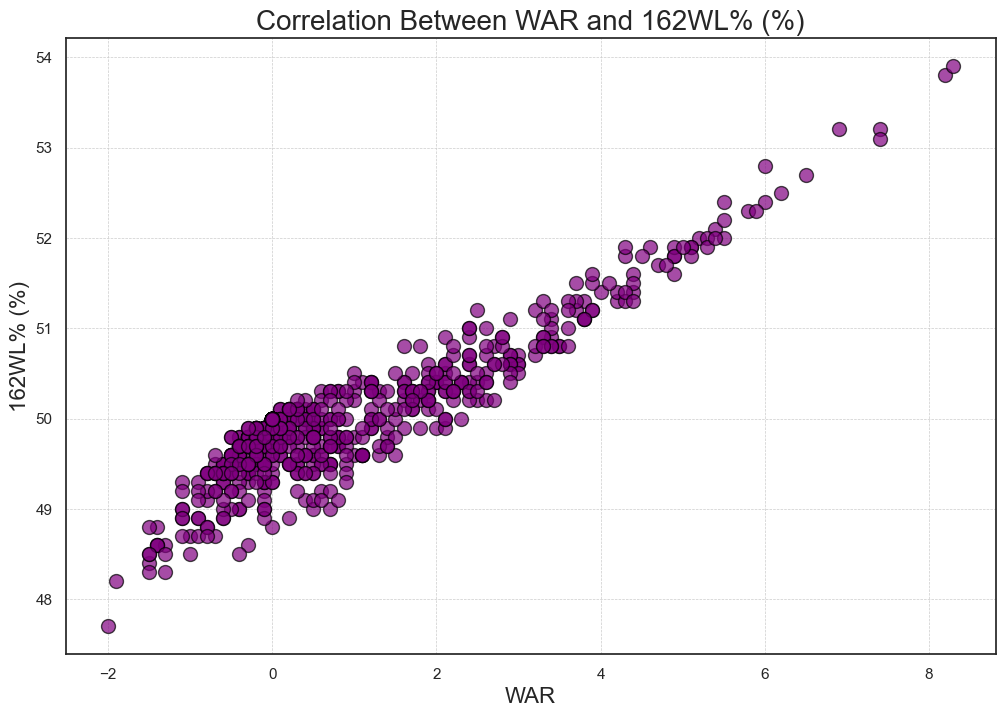

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_name = "WAR_2023.csv"
data = pd.read_csv(file_name, encoding='latin1')

# Extract columns 16 (WAR) and 18, and convert column 18 to percentages
column_16 = data.iloc[:, 15].rename("WAR")
column_18 = (data.iloc[:, 17] * 100).rename(f"{data.columns[17]} (%)")  # Convert to percentage

# Combine these columns into a DataFrame
combined_data = pd.DataFrame({
    'WAR': column_16,
    f'{data.columns[17]} (%)': column_18
}).dropna()

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(combined_data['WAR'], combined_data[f'{data.columns[17]} (%)'], color='purple', edgecolor='black', s=100, alpha=0.7)

# Add title and labels
plt.title(f'Correlation Between WAR and {data.columns[17]} (%)', fontsize=20)
plt.xlabel('WAR', fontsize=16)
plt.ylabel(f'{data.columns[17]} (%)', fontsize=16)

# Add grid
plt.grid(True, linestyle='--', linewidth=0.5)

# Show plot
plt.show()
